In [1]:
!pip install Gudiya==0.1.1.4

In [0]:
import torchvision
import torch
import torch.optim as optim
import torch.nn as nn
import torchvision.transforms as transforms

In [0]:
import Gudiya.Model as Md
import Gudiya.TrainTestandUtils as Tt

In [4]:
transform = transforms.Compose(
    [ transforms.RandomCrop(32, padding=4),
     transforms.RandomHorizontalFlip(),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128,
                                          shuffle=True, num_workers=4)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=128,
                                         shuffle=False, num_workers=4)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print (device)

cuda


In [0]:
model = Md.ResNet18().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.95,weight_decay=0.0004)
scheduler = optim.lr_scheduler.OneCycleLR(optimizer,max_lr=0.1,total_steps=40)

new_model = Tt(model=model,
               device=device,
               optimizer=optimizer,
               criterion=criterion,
               scheduler=scheduler,
               trainloader=trainloader,
               testloader=testloader,
               epochs=40,
               input_size=(3,32,32),
               classes=classes)

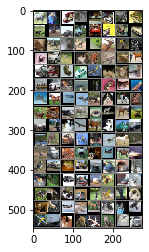

In [7]:
new_model.plot_train_images()

In [8]:
new_model.disp_summary()

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

In [9]:
new_model.runModel()

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH  1


Loss=1.5824205875396729 Batch_id=390 Accuracy=46.48: 100%|██████████| 391/391 [00:29<00:00, 14.18it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0102, Accuracy: 5493/10000 (54.93%)

EPOCH  2


Loss=0.6596814393997192 Batch_id=390 Accuracy=64.46: 100%|██████████| 391/391 [00:29<00:00, 14.10it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0068, Accuracy: 7012/10000 (70.12%)

EPOCH  3


Loss=0.7252039909362793 Batch_id=390 Accuracy=71.93: 100%|██████████| 391/391 [00:29<00:00, 14.33it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0058, Accuracy: 7480/10000 (74.80%)

EPOCH  4


Loss=0.5954992175102234 Batch_id=390 Accuracy=75.14: 100%|██████████| 391/391 [00:29<00:00, 14.39it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0058, Accuracy: 7460/10000 (74.60%)

EPOCH  5


Loss=0.43028491735458374 Batch_id=390 Accuracy=78.56: 100%|██████████| 391/391 [00:29<00:00, 14.38it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0062, Accuracy: 7324/10000 (73.24%)

EPOCH  6


Loss=0.7000598907470703 Batch_id=390 Accuracy=80.90: 100%|██████████| 391/391 [00:29<00:00, 14.28it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0046, Accuracy: 7994/10000 (79.94%)

EPOCH  7


Loss=0.3441097140312195 Batch_id=390 Accuracy=82.40: 100%|██████████| 391/391 [00:29<00:00, 14.06it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0070, Accuracy: 7318/10000 (73.18%)

EPOCH  8


Loss=0.510576605796814 Batch_id=390 Accuracy=84.53: 100%|██████████| 391/391 [00:29<00:00, 14.17it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0054, Accuracy: 7790/10000 (77.90%)

EPOCH  9


Loss=0.5856500267982483 Batch_id=390 Accuracy=85.24: 100%|██████████| 391/391 [00:29<00:00, 14.17it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0050, Accuracy: 7941/10000 (79.41%)

EPOCH  10


Loss=0.38336169719696045 Batch_id=390 Accuracy=86.23: 100%|██████████| 391/391 [00:29<00:00, 14.15it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0040, Accuracy: 8279/10000 (82.79%)

EPOCH  11


Loss=0.4009135663509369 Batch_id=390 Accuracy=87.12: 100%|██████████| 391/391 [00:29<00:00, 14.29it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0038, Accuracy: 8370/10000 (83.70%)

EPOCH  12


Loss=0.269589900970459 Batch_id=390 Accuracy=87.67: 100%|██████████| 391/391 [00:29<00:00, 14.05it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0039, Accuracy: 8330/10000 (83.30%)

EPOCH  13


Loss=0.3397536873817444 Batch_id=390 Accuracy=88.20: 100%|██████████| 391/391 [00:29<00:00, 14.36it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0045, Accuracy: 8173/10000 (81.73%)

EPOCH  14


Loss=0.2968100905418396 Batch_id=390 Accuracy=88.99: 100%|██████████| 391/391 [00:29<00:00, 13.14it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0039, Accuracy: 8337/10000 (83.37%)

EPOCH  15


Loss=0.2222726047039032 Batch_id=390 Accuracy=89.46: 100%|██████████| 391/391 [00:29<00:00, 14.22it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0042, Accuracy: 8256/10000 (82.56%)

EPOCH  16


Loss=0.4267595708370209 Batch_id=390 Accuracy=89.85: 100%|██████████| 391/391 [00:29<00:00, 14.24it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0041, Accuracy: 8271/10000 (82.71%)

EPOCH  17


Loss=0.3489958345890045 Batch_id=390 Accuracy=89.83: 100%|██████████| 391/391 [00:29<00:00, 14.15it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0034, Accuracy: 8584/10000 (85.84%)

EPOCH  18


Loss=0.4944697916507721 Batch_id=390 Accuracy=90.12: 100%|██████████| 391/391 [00:29<00:00, 14.28it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0037, Accuracy: 8461/10000 (84.61%)

EPOCH  19


Loss=0.38249263167381287 Batch_id=390 Accuracy=90.34: 100%|██████████| 391/391 [00:29<00:00, 14.15it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0037, Accuracy: 8450/10000 (84.50%)

EPOCH  20


Loss=0.21098139882087708 Batch_id=390 Accuracy=90.71: 100%|██████████| 391/391 [00:29<00:00, 14.25it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0034, Accuracy: 8566/10000 (85.66%)

EPOCH  21


Loss=0.30982837080955505 Batch_id=390 Accuracy=91.16: 100%|██████████| 391/391 [00:29<00:00, 14.27it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0034, Accuracy: 8545/10000 (85.45%)

EPOCH  22


Loss=0.29395121335983276 Batch_id=390 Accuracy=91.11: 100%|██████████| 391/391 [00:29<00:00, 14.27it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0031, Accuracy: 8717/10000 (87.17%)

EPOCH  23


Loss=0.2756231725215912 Batch_id=390 Accuracy=91.51: 100%|██████████| 391/391 [00:29<00:00, 14.06it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0047, Accuracy: 8102/10000 (81.02%)

EPOCH  24


Loss=0.187540203332901 Batch_id=390 Accuracy=91.86: 100%|██████████| 391/391 [00:29<00:00, 14.28it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0033, Accuracy: 8559/10000 (85.59%)

EPOCH  25


Loss=0.19240634143352509 Batch_id=390 Accuracy=92.29: 100%|██████████| 391/391 [00:29<00:00, 14.28it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0043, Accuracy: 8308/10000 (83.08%)

EPOCH  26


Loss=0.226116344332695 Batch_id=390 Accuracy=92.37: 100%|██████████| 391/391 [00:29<00:00, 14.32it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0030, Accuracy: 8739/10000 (87.39%)

EPOCH  27


Loss=0.2905154824256897 Batch_id=390 Accuracy=93.09: 100%|██████████| 391/391 [00:29<00:00, 14.28it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0033, Accuracy: 8653/10000 (86.53%)

EPOCH  28


Loss=0.2300000637769699 Batch_id=390 Accuracy=93.36: 100%|██████████| 391/391 [00:29<00:00, 14.21it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0029, Accuracy: 8857/10000 (88.57%)

EPOCH  29


Loss=0.25703662633895874 Batch_id=390 Accuracy=93.87: 100%|██████████| 391/391 [00:29<00:00, 14.36it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0026, Accuracy: 8937/10000 (89.37%)

EPOCH  30


Loss=0.17860513925552368 Batch_id=390 Accuracy=94.71: 100%|██████████| 391/391 [00:29<00:00, 14.28it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0025, Accuracy: 8975/10000 (89.75%)

EPOCH  31


Loss=0.08441048860549927 Batch_id=390 Accuracy=95.25: 100%|██████████| 391/391 [00:29<00:00, 14.29it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0022, Accuracy: 9054/10000 (90.54%)

EPOCH  32


Loss=0.09144003689289093 Batch_id=390 Accuracy=96.30: 100%|██████████| 391/391 [00:29<00:00, 13.19it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0026, Accuracy: 8947/10000 (89.47%)

EPOCH  33


Loss=0.04228239506483078 Batch_id=390 Accuracy=97.03: 100%|██████████| 391/391 [00:29<00:00, 14.22it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0021, Accuracy: 9154/10000 (91.54%)

EPOCH  34


Loss=0.050701290369033813 Batch_id=390 Accuracy=97.54: 100%|██████████| 391/391 [00:29<00:00, 14.38it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0020, Accuracy: 9226/10000 (92.26%)

EPOCH  35


Loss=0.02000347338616848 Batch_id=390 Accuracy=98.41: 100%|██████████| 391/391 [00:29<00:00, 14.12it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0019, Accuracy: 9280/10000 (92.80%)

EPOCH  36


Loss=0.003961229231208563 Batch_id=390 Accuracy=98.95: 100%|██████████| 391/391 [00:29<00:00, 14.09it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0018, Accuracy: 9322/10000 (93.22%)

EPOCH  37


Loss=0.043718840926885605 Batch_id=390 Accuracy=99.31: 100%|██████████| 391/391 [00:29<00:00, 14.13it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0018, Accuracy: 9339/10000 (93.39%)

EPOCH  38


Loss=0.06136121600866318 Batch_id=390 Accuracy=99.55: 100%|██████████| 391/391 [00:29<00:00, 14.19it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0017, Accuracy: 9376/10000 (93.76%)

EPOCH  39


Loss=0.0057197390124201775 Batch_id=390 Accuracy=99.66: 100%|██████████| 391/391 [00:29<00:00, 14.07it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0018, Accuracy: 9351/10000 (93.51%)

EPOCH  40


Loss=0.03229350596666336 Batch_id=390 Accuracy=99.63: 100%|██████████| 391/391 [00:29<00:00, 14.28it/s]


Test set: Average loss: 0.0018, Accuracy: 9354/10000 (93.54%)



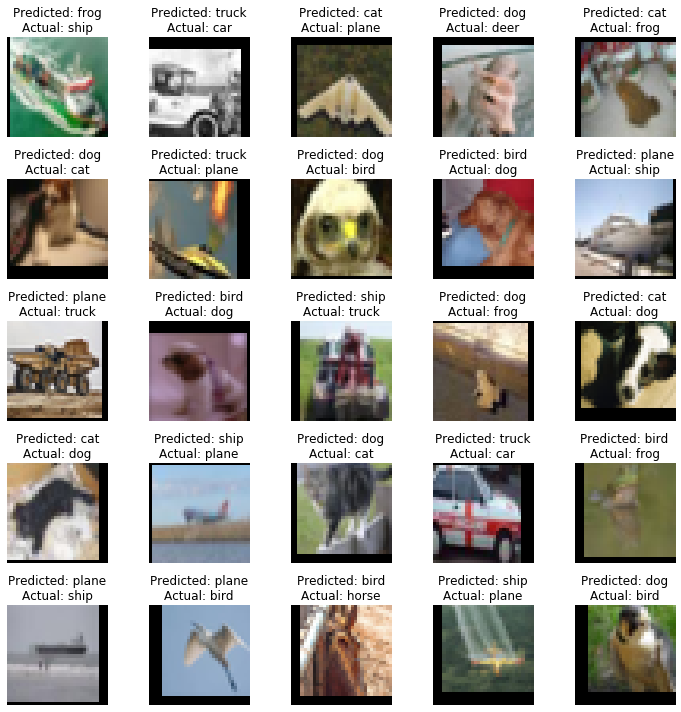

In [10]:
new_model.plot_misclassified('mis.jpg')

In [11]:
new_model.total_accuracy()

Accuracy of the network on the 10000 test images: 93 %


In [12]:
new_model.classwise_acc()


Accuracy of plane : 89 %
Accuracy of   car : 96 %
Accuracy of  bird : 78 %
Accuracy of   cat : 79 %
Accuracy of  deer : 92 %
Accuracy of   dog : 87 %
Accuracy of  frog : 91 %
Accuracy of horse : 88 %
Accuracy of  ship : 100 %
Accuracy of truck : 94 %



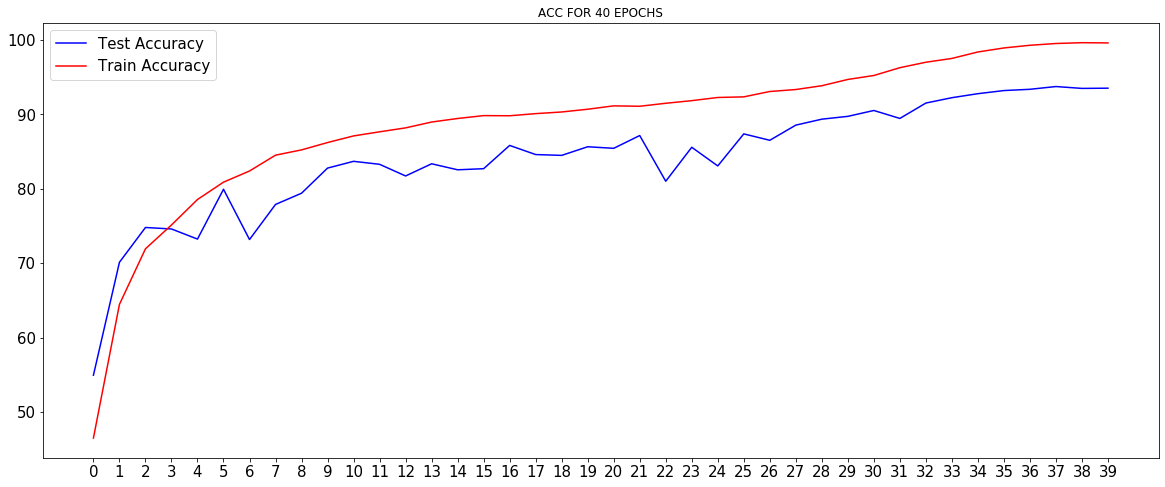

In [13]:
new_model.plot_train_test_acc()